# Question 1: Performance of schools with art programs versus no art programs

Question 1: How does art program staffing affect state test results (ELA & Math) in New York City schools?

Hypothesis: IF art programs have an affect on state test results THEN there will be a statistically significant difference in ELA and Math state test scores between schools with a full time arts supervisor and schools without a full time arts supervisor.
    
Null Hypothesis: IF art programs do not have an affect on state test results THEN there will be no statistically significant difference in ELA and Math state test scores between schools with a full time arts supervisor and schools without a full time arts supervisor.


GET AND MERGE DATA

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats


In [6]:
#load data 
#resource for converting:https://medium.com/better-programming/using-python-to-convert-worksheets-in-an-excel-file-to-separate-csv-files-7dd406b652d7

#survey_2014_2015 = "2014-2015_Arts_Survey_Data.csv"
#survey_2015_2016 = "2015-2016_Arts_Survey_Data.csv"
survey_2016_2017 = "../data/2016-2017_Arts_Survey_Data.csv"
survey_2017_2018 = "../data/2017-2018_Arts_Survey_Data.csv"
survey_2018_2019 = "../data/2018-2019_Arts_Survey_Data.csv"
ELA_2013_2019 = "../data/2013-2019_school_ela_results.csv"
Math_2013_2019 = "../data/2013-2019_school_ela_results.csv"

#survey_2014_2015_df = pd.read_csv(survey_2014_2015, encoding='utf-8', dtype = 'unicode')
#survey_2015_2016_df = pd.read_csv(survey_2015_2016, encoding='utf-8', dtype = 'unicode')
survey_2016_2017_df = pd.read_csv(survey_2016_2017, encoding='utf-8', dtype = 'unicode')
survey_2017_2018_df = pd.read_csv(survey_2017_2018, encoding='utf-8', dtype = 'unicode')
survey_2018_2019_df = pd.read_csv(survey_2018_2019, encoding='utf-8', dtype = 'unicode')
ELA_2013_2019_df = pd.read_csv(ELA_2013_2019, encoding='utf-8', dtype = 'unicode')
Math_2013_2019_df = pd.read_csv(Math_2013_2019, encoding='utf-8', dtype = 'unicode')

In [7]:
#Merge data by DBN and SchoolYear

#Add SchoolYear columns and SchoolYear to each survey file
survey_2016_2017_df["Year"] = '2017'
survey_2017_2018_df["Year"] = '2018'
survey_2018_2019_df["Year"] = '2019'

#Add subject to state test score files
ELA_2013_2019_df["Subject"] = 'ELA'
Math_2013_2019_df["Subject"] = 'Math'

#Change Q0_DBN column to just DBN in survey data
survey_2016_2017_dbn = survey_2016_2017_df.rename(columns = {'Q0_DBN':'DBN'})
survey_2016_2017_dbn
survey_2017_2018_dbn = survey_2017_2018_df.rename(columns = {'Q0_DBN':'DBN'})
survey_2017_2018_dbn
survey_2018_2019_dbn = survey_2018_2019_df.rename(columns = {'Q0_DBN':'DBN'})
survey_2018_2019_dbn

#Append survey results
survey_2016_2018 = survey_2016_2017_dbn.append(survey_2017_2018_dbn)
survey_2016_2019 = survey_2016_2018.append(survey_2018_2019_dbn)
survey_2016_2019
#append state test files
TestResults_2013_2019 = ELA_2013_2019_df.append(Math_2013_2019_df)
TestResults_2013_2019

#Merge survey and state test results files on Year and DBN
combined_df = pd.merge(TestResults_2013_2019, survey_2016_2019, how='inner', on=['Year', 'DBN'])
#combined_df.head(1)

EXPLORE AND CLEAN DATA

In [8]:
#explore combined_df should have 27175 rows and 1840 columns
combined_df.shape

(27336, 1840)

In [9]:
#explore column headers
#list(combined_df.columns)

In [10]:
#only choose columns necessary for analysis df1 = df[['a','b']]
cleaned_df = combined_df[["DBN", "School Name", "Grade", "Year", 
                          "Subject", "# Level 3+4", "% Level 3+4", 
                          "Q3_1", "Q3_2", "Q3_3", "Q3_4"]]
cleaned_df.head(1)

,DBN,School Name,Grade,Year,Subject,# Level 3+4,% Level 3+4,Q3_1,Q3_2,Q3_3,Q3_4
0,01M015,P.S. 015 ROBERTO CLEMENTE,3,2017,ELA,9,33.33333206,0,1,0,0


In [11]:
#rename columns
   
col_rename_dict = {
    "Q3_1": "Full Time",
    "Q3_2": "Full Time Plus",
    "Q3_3": "Part Time",
    "Q3_4": "None",

}
renamed_df = cleaned_df.rename(columns=col_rename_dict)
renamed_df.head(1)

,DBN,School Name,Grade,Year,Subject,# Level 3+4,% Level 3+4,Full Time,Full Time Plus,Part Time,None
0,01M015,P.S. 015 ROBERTO CLEMENTE,3,2017,ELA,9,33.33333206,0,1,0,0


In [12]:
#68 rows have an 's' in the % of Level 3+4 and need to be removed
sorted_df = renamed_df.sort_values("% Level 3+4", ascending = True)
sorted_df["% Level 3+4"]
sorted_df.groupby(["% Level 3+4"]).count()


# Get names of indexes for which % Level 3+4 has value 's'
indexNames = renamed_df[renamed_df['% Level 3+4'] == 's' ].index
 
# Delete 's' row indexes from dataFrame
renamed_df.drop(indexNames , inplace=True)
renamed_df.head(1)

,DBN,School Name,Grade,Year,Subject,# Level 3+4,% Level 3+4,Full Time,Full Time Plus,Part Time,None
0,01M015,P.S. 015 ROBERTO CLEMENTE,3,2017,ELA,9,33.33333206,0,1,0,0


In [13]:
#Only include ALL Grades rows to summarize data by the school level
cond = renamed_df["Grade"] == "All Grades"
renamed_df =renamed_df[cond]
renamed_df.head(5)

,DBN,School Name,Grade,Year,Subject,# Level 3+4,% Level 3+4,Full Time,Full Time Plus,Part Time,None
3,01M015,P.S. 015 ROBERTO CLEMENTE,All Grades,2017,ELA,24,35.82089615,0,1,0,0
7,01M015,P.S. 015 ROBERTO CLEMENTE,All Grades,2017,Math,24,35.82089615,0,1,0,0
11,01M015,P.S. 015 ROBERTO CLEMENTE,All Grades,2018,ELA,45,67.16417694,0,1,0,0
15,01M015,P.S. 015 ROBERTO CLEMENTE,All Grades,2018,Math,45,67.16417694,0,1,0,0
19,01M015,P.S. 015 ROBERTO CLEMENTE,All Grades,2019,ELA,42,60,0,1,0,0


In [14]:
#explore data- get # of rows
total = len(renamed_df)
total

6276

In [15]:
#Unique schools
renamed_df["DBN"].nunique()

1116

In [16]:
#change type to perform analyses
renamed_df['Full Time'] = renamed_df['Full Time'].astype(float)
renamed_df['Full Time Plus'] = renamed_df['Full Time Plus'].astype(float)
renamed_df['Part Time'] = renamed_df['Part Time'].astype(float)
renamed_df['None'] = renamed_df['None'].astype(float)
renamed_df['% Level 3+4'] = renamed_df['% Level 3+4'].astype(float)

In [17]:
#Write file to csv
#renamed_df.to_csv('renamed1_df.csv', index=False)


Analyze Data- Full Time vs. Others
1. Math and ELA together
2. Math only
3. ELA only

In [18]:
#1. Create a summary table with frequencies of responses- ELA and Math together

fulltime = renamed_df["Full Time"].sum()
fulltime
fulltimeplus = renamed_df["Full Time Plus"].sum()
fulltimeplus
parttime = renamed_df["Part Time"].sum()
parttime
none = renamed_df["None"].sum()
none
count_total = fulltime + fulltimeplus + parttime + none
alltheothers = fulltimeplus + parttime + none

#8 rows of data did not answer question.
unaccounted = total - count_total

summary_dict = {'Full Time Only': [fulltime],
        'Full Time Plus Count': [fulltimeplus],
          'Part Time Count': [parttime],
          'None Count': [none],
                 'Not Full Time Only': [alltheothers],
               'Total of these measures': [count_total],
                 'Total': [total],
               'Did Not Answer this Question': [unaccounted]}
summary = pd.DataFrame.from_dict(summary_dict) #, orient='index')
summary

,Full Time Only,Full Time Plus Count,Part Time Count,None Count,Not Full Time Only,Total of these measures,Total,Did Not Answer this Question
0,170.0,4230.0,436.0,1432.0,6098.0,6268.0,6276,8.0


In [19]:
#2. Create a summary table with frequencies of responses- Math only
m_fulltime = math_renamed_df["Full Time"].sum()
m_fulltime
m_fulltimeplus = math_renamed_df["Full Time Plus"].sum()
m_fulltimeplus
m_parttime = math_renamed_df["Part Time"].sum()
m_parttime
m_none = math_renamed_df["None"].sum()
m_none
m_count_total = m_fulltime + m_fulltimeplus + m_parttime + m_none
m_alltheothers = m_fulltimeplus + m_parttime + m_none

#What to do with 8 rows of unanswered data?
m_unaccounted = total - m_count_total

summary_dict = {'Full Time Only': [m_fulltime],
        'Full Time Plus Count': [m_fulltimeplus],
          'Part Time Count': [m_parttime],
          'None Count': [m_none],
                 'Not Full Time Only': [m_alltheothers],
               'Total of these measures': [m_count_total],
                 'Total': [total],
               'Did Not Answer this Question': [m_unaccounted]}
m_summary = pd.DataFrame.from_dict(summary_dict) #, orient='index')
m_summary

NameError: name 'math_renamed_df' is not defined

In [20]:
#3. Create a summary table with frequencies of responses- ELA only
ela_fulltime = ela_renamed_df["Full Time"].sum()
ela_fulltime
ela_fulltimeplus = ela_renamed_df["Full Time Plus"].sum()
ela_fulltimeplus
ela_parttime = ela_renamed_df["Part Time"].sum()
ela_parttime
ela_none = ela_renamed_df["None"].sum()
ela_none
ela_count_total = ela_fulltime + ela_fulltimeplus + ela_parttime + ela_none
ela_alltheothers = ela_fulltimeplus + ela_parttime + ela_none

#What to do with 8 rows of unanswered data?
ela_unaccounted = total - ela_count_total

summary_dict = {'Full Time Only': [ela_fulltime],
        'Full Time Plus': [ela_fulltimeplus],
          'Part Time': [ela_parttime],
          'None': [ela_none],
              #   'Not Full Time Only': [ela_alltheothers],
               'Total': [ela_count_total]}
ela_summary = pd.DataFrame.from_dict(summary_dict) #, orient='index')
ela_summary

NameError: name 'ela_renamed_df' is not defined

In [21]:
#1. Math and ELA together frequencies
renamed_df.groupby(["Full Time"])["% Level 3+4"].count()

Full Time
0.0    6106
1.0     170
Name: % Level 3+4, dtype: int64

In [22]:
#2. Math only frequencies
cond1 = renamed_df['Subject'] == 'Math'
math_renamed_df = renamed_df[cond1]
math_renamed_df.groupby(["Full Time"])["% Level 3+4"].count()

Full Time
0.0    3053
1.0      85
Name: % Level 3+4, dtype: int64

In [23]:
#3. ELA only frequencies
cond2 = renamed_df['Subject'] == 'ELA'
ela_renamed_df = renamed_df[cond2]
ela_renamed_df.groupby(["Full Time"])["% Level 3+4"].count()

Full Time
0.0    3053
1.0      85
Name: % Level 3+4, dtype: int64

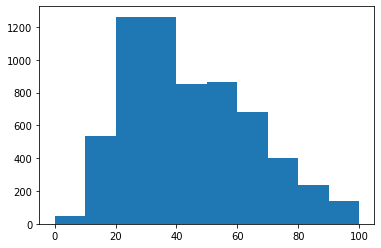

In [26]:
#1 Math and ELA together histograms
#plt.hist(renamed_df["% Level 3+4"], bins=None, histtype='bar', align='mid', orientation='vertical')
#plt.savefig("../images/MathandELAHistogram.png")

Text(0.5, 0, 'Pass Rate')

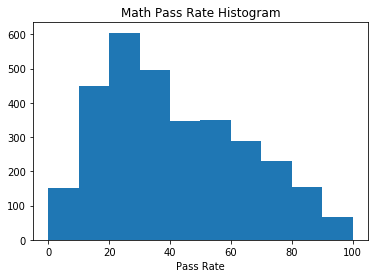

In [139]:
#2. Math histogram
plt.hist(math_renamed_df["% Level 3+4"], bins=None, histtype='bar', align='mid', orientation='vertical')
plt.title("Math Pass Rate Histogram")
plt.xlabel("Pass Rate")
plt.savefig("../images/MathStateTestScores_Histogram.png")

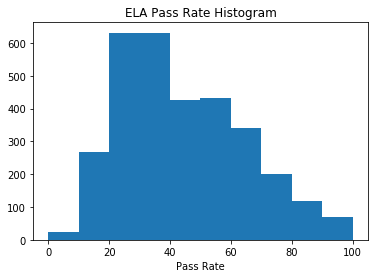

In [27]:
#3. ELA histogram
plt.hist(ela_renamed_df["% Level 3+4"], bins=None, histtype='bar', align='mid', orientation='vertical')
plt.title("ELA Pass Rate Histogram")
plt.xlabel("Pass Rate")
plt.savefig("../images/ELAStateTestScores_Histogram.png")

In [28]:
#1. Math and ELA descriptives pd.concat([s1, s2], ignore_index=True), df.columns = ['a', 'b', 'c']
MandELA_mean = renamed_df.groupby(["Full Time"])["% Level 3+4"].mean()
MandELA_median = renamed_df.groupby(["Full Time"])["% Level 3+4"].median()
MandELA_var = renamed_df.groupby(["Full Time"])["% Level 3+4"].var()
MandELA_std = renamed_df.groupby(["Full Time"])["% Level 3+4"].std()
MandELA_max = renamed_df.groupby(["Full Time"])["% Level 3+4"].max()
MandELA_min = renamed_df.groupby(["Full Time"])["% Level 3+4"].min()

summary = pd.concat([MandELA_mean, MandELA_median, MandELA_var, MandELA_std, 
                     MandELA_max, MandELA_min], axis=1, join='inner')

summary.columns = ['Mean', 'Median', 'Variance', "Standard Deviation", "Maximum", "Minimum"]
summary

,Mean,Median,Variance,Standard Deviation,Maximum,Minimum
Full Time,,,,,,
0.0,44.026311,40.401787,409.769370,20.242761,100.000000,0.000000
1.0,45.974563,41.046658,476.691133,21.833257,97.530861,12.592592


In [29]:
#2. Math descriptives pd.concat([s1, s2], ignore_index=True), df.columns = ['a', 'b', 'c']
M_mean = math_renamed_df.groupby(["Full Time"])["% Level 3+4"].mean()
M_median = math_renamed_df.groupby(["Full Time"])["% Level 3+4"].median()
M_var = math_renamed_df.groupby(["Full Time"])["% Level 3+4"].var()
M_std = math_renamed_df.groupby(["Full Time"])["% Level 3+4"].std()
M_max = math_renamed_df.groupby(["Full Time"])["% Level 3+4"].max()
M_min = math_renamed_df.groupby(["Full Time"])["% Level 3+4"].min()

m_summary = pd.concat([M_mean, M_median, M_var, M_std, 
                     M_max, M_min], axis=1, join='inner')

m_summary.columns = ['Mean', 'Median', 'Variance', "Standard Deviation", "Maximum", "Minimum"]
m_summary

,Mean,Median,Variance,Standard Deviation,Maximum,Minimum
Full Time,,,,,,
0.0,44.026311,40.401787,409.836502,20.244419,100.000000,0.000000
1.0,45.974563,41.046658,479.528580,21.898141,97.530861,12.592592


In [30]:
#3. ELA descriptives pd.concat([s1, s2], ignore_index=True), df.columns = ['a', 'b', 'c']
ela_mean = ela_renamed_df.groupby(["Full Time"])["% Level 3+4"].mean()
ela_median = ela_renamed_df.groupby(["Full Time"])["% Level 3+4"].median()
ela_var = ela_renamed_df.groupby(["Full Time"])["% Level 3+4"].var()
ela_std = ela_renamed_df.groupby(["Full Time"])["% Level 3+4"].std()
ela_max = ela_renamed_df.groupby(["Full Time"])["% Level 3+4"].max()
ela_min = ela_renamed_df.groupby(["Full Time"])["% Level 3+4"].min()

ela_summary = pd.concat([ela_mean, ela_median, ela_var, ela_std, 
                     ela_max, ela_min], axis=1, join='inner')

ela_summary.columns = ['Mean', 'Median', 'Variance', "Standard Deviation", "Maximum", "Minimum"]
ela_summary

,Mean,Median,Variance,Standard Deviation,Maximum,Minimum
Full Time,,,,,,
0.0,44.026311,40.401787,409.836502,20.244419,100.000000,0.000000
1.0,45.974563,41.046658,479.528580,21.898141,97.530861,12.592592


In [31]:
#1. Math and ELA together Welch's independent ttest

#perform independent t-test to see if no art programs is different from 1 or more art programs group both Math and ELA
#(Welch's t-test) equal_var = False
fulltime_test = renamed_df[renamed_df['Full Time'] == 1]
none_test = renamed_df[renamed_df['Full Time'] == 0]

stats.ttest_ind(fulltime_test['% Level 3+4'], none_test['% Level 3+4'], equal_var=False)

Ttest_indResult(statistic=1.1497818446116863, pvalue=0.2517832990681651)

In [32]:
#2. Math Welch's independent ttest

#perform independent t-test to see if no art programs is different from 1 or more art programs group both Math and ELA
#(Welch's t-test) equal_var = False
fulltime_test = math_renamed_df[math_renamed_df['Full Time'] == 1]
none_test = math_renamed_df[math_renamed_df['Full Time'] == 0]

stats.ttest_ind(fulltime_test['% Level 3+4'], none_test['% Level 3+4'], equal_var=False)

Ttest_indResult(statistic=0.8106641082662113, pvalue=0.4197445014919684)

AxesSubplot(0.1,0.15;0.8x0.75)


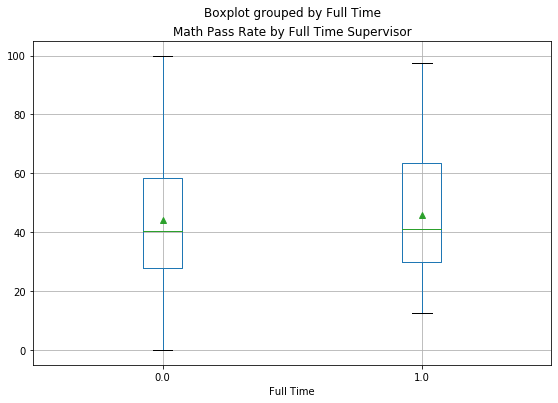

In [58]:
#2. Math boxplot
boxplot = math_renamed_df.boxplot("% Level 3+4", by="Full Time", figsize=(9, 6), meanline=False, showmeans=True)
boxplot.set_title("Math Pass Rate by Full Time Supervisor")
print(boxplot)
plt.savefig("../images/Math_boxplot_fulltimesupervisor.png")

In [33]:
#3. ELA Welch's independent ttest

#perform independent t-test to see if no art programs is different from 1 or more art programs group both Math and ELA
#(Welch's t-test) equal_var = False
fulltime_test = ela_renamed_df[ela_renamed_df['Full Time'] == 1]
none_test = ela_renamed_df[ela_renamed_df['Full Time'] == 0]

stats.ttest_ind(fulltime_test['% Level 3+4'], none_test['% Level 3+4'], equal_var=False)

Ttest_indResult(statistic=0.8106641082662113, pvalue=0.4197445014919684)

AxesSubplot(0.1,0.15;0.8x0.75)


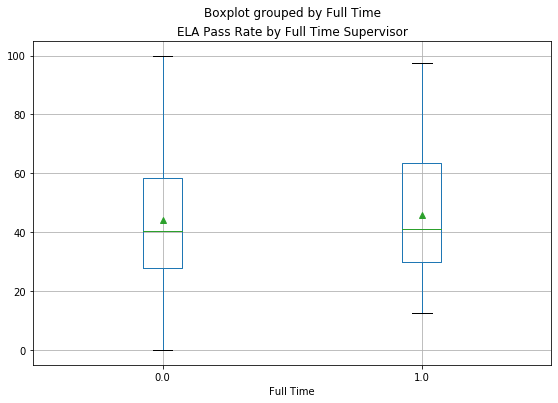

In [59]:
#3. ELA boxplot
boxplot = ela_renamed_df.boxplot("% Level 3+4", by="Full Time", figsize=(9, 6), meanline=False, showmeans=True)
boxplot.set_title("ELA Pass Rate by Full Time Supervisor")
print(boxplot)
plt.savefig("../images/ELA_boxplot_fulltimesupervisor.png")

There isn't a statistically significant difference between schools with full time art supervisor and those without for ELA and ELA & Math combined or ELA.

Use ANOVA to check for differences by year

In [34]:
#create conditions for each year
cond1 = renamed_df['Year'] == '2017'
cond2 = renamed_df['Year'] == '2018'
cond3 = renamed_df['Year'] == '2019'

#create data frame for each year
df_2017 = renamed_df[cond1]
df_2018 = renamed_df[cond2]
df_2019 = renamed_df[cond3]

group1 = df_2017["% Level 3+4"]
group2 = df_2018["% Level 3+4"]
group3 = df_2019["% Level 3+4"]

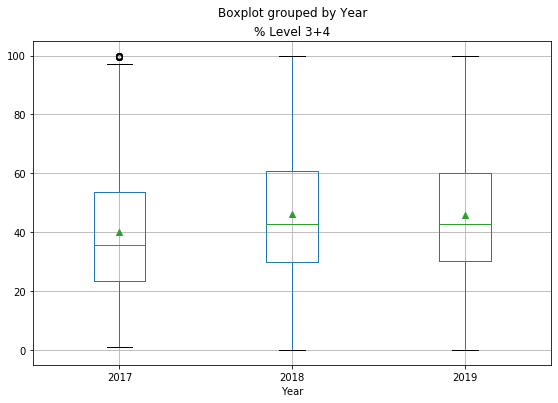

In [35]:
#boxplot
renamed_df.boxplot("% Level 3+4", by="Year", figsize=(9, 6), meanline=False, showmeans=True)

In [36]:
#ANOVA to see if school years are significantly different
stats.f_oneway(group1, group2, group3)
#stats.f_oneway(group2, group3)
#stats.f_oneway(group1, group2)

F_onewayResult(statistic=62.54268633874496, pvalue=1.274435349008814e-27)

Look for schools who went from having no full time arts supervisor to having full time supervisor

36 schools went from having no full time art supervisor to having full time supervisor.

In [37]:
#Merge to identify schools that changed from no full time to full time
cond1 = df_2017['Full Time'] == 0
cond2 = df_2018['Full Time'] == 1
cols = ["DBN", "School Name", 'Year', "% Level 3+4", "Full Time", "Subject"]

df_2017_noft = df_2017[cond1][cols]
df_2018_ft = df_2018[cond2][cols]


#merge on DBN DataFrame.merge(self, right, how='inner', on=None,
change_table = df_2017_noft.merge(df_2018_ft, how = 'inner', on='DBN')
change_table

,DBN,School Name_x,Year_x,% Level 3+4_x,Full Time_x,Subject_x,School Name_y,Year_y,% Level 3+4_y,Full Time_y,Subject_y
0,02M033,P.S. 033 CHELSEA PREP,2017,68.661972,0.0,ELA,P.S. 033 CHELSEA PREP,2018,67.326736,1.0,ELA
1,02M033,P.S. 033 CHELSEA PREP,2017,68.661972,0.0,ELA,P.S. 033 CHELSEA PREP,2018,67.326736,1.0,Math
2,02M033,P.S. 033 CHELSEA PREP,2017,68.661972,0.0,Math,P.S. 033 CHELSEA PREP,2018,67.326736,1.0,ELA
3,02M033,P.S. 033 CHELSEA PREP,2017,68.661972,0.0,Math,P.S. 033 CHELSEA PREP,2018,67.326736,1.0,Math
4,03M242,P.S. 242 - THE YOUNG DIPLOMATS MAGNET ACADEMY,2017,20.588236,0.0,ELA,P.S. 242 - THE YOUNG DIPLOMATS MAGNET ACADEMY,2018,30.434782,1.0,ELA
...,...,...,...,...,...,...,...,...,...,...,...
67,30Q286,"YOUNG WOMEN'S LEADERSHIP SCHOOL, ASTORIA",2017,72.566368,0.0,Math,"YOUNG WOMEN'S LEADERSHIP SCHOOL, ASTORIA",2018,75.423729,1.0,Math
68,31R075,I.S. 075 FRANK D. PAULO,2017,59.264931,0.0,ELA,I.S. 075 FRANK D. PAULO,2018,66.236725,1.0,ELA
69,31R075,I.S. 075 FRANK D. PAULO,2017,59.264931,0.0,ELA,I.S. 075 FRANK D. PAULO,2018,66.236725,1.0,Math
70,31R075,I.S. 075 FRANK D. PAULO,2017,59.264931,0.0,Math,I.S. 075 FRANK D. PAULO,2018,66.236725,1.0,ELA


In [38]:
#Write file to csv to check that table merged correctly
#change_table.to_csv('tableofchange.csv', index=False)

In [39]:
#How many schools is this? 2 years * 2 subjects = 4 rows per school
change_table["DBN"].value_counts()

05M194    4
12X314    4
30Q286    4
26Q216    4
24Q005    4
26Q098    4
02M033    4
19K065    4
31R075    4
30Q145    4
03M242    4
03M421    4
15K001    4
07X161    4
27Q232    4
19K409    4
28Q680    4
15K130    4
Name: DBN, dtype: int64

In [40]:
#separate and append to be able to run tests and create box plot
cols1 = ["DBN", "School Name_x", "Year_x", "% Level 3+4_x", "Full Time_x", "Subject_x"]
cols2 = ["DBN", "School Name_y", "Year_y", "% Level 3+4_y", "Full Time_y", "Subject_y"]

firstyear = change_table[cols1]
secondyear = change_table[cols2]

#rename columns df.rename(columns={"A": "a", "B": "c"})
first_clean = firstyear.rename(columns={"School Name_x": "School_Name", 
                          "Year_x": "Year", 
                          "% Level 3+4_x": "% Level 3+4",
                        "Subject_x": "Subject",
                          "Full Time_x": "Full Time"})
second_clean = secondyear.rename(columns={"School Name_y": "School_Name", 
                          "Year_y": "Year", 
                          "% Level 3+4_y": "% Level 3+4",
                        "Subject_y": "Subject",
                          "Full Time_y": "Full Time"})

appended_df = first_clean.append(second_clean)
appended_df

,DBN,School_Name,Year,% Level 3+4,Full Time,Subject
0,02M033,P.S. 033 CHELSEA PREP,2017,68.661972,0.0,ELA
1,02M033,P.S. 033 CHELSEA PREP,2017,68.661972,0.0,ELA
2,02M033,P.S. 033 CHELSEA PREP,2017,68.661972,0.0,Math
3,02M033,P.S. 033 CHELSEA PREP,2017,68.661972,0.0,Math
4,03M242,P.S. 242 - THE YOUNG DIPLOMATS MAGNET ACADEMY,2017,20.588236,0.0,ELA
...,...,...,...,...,...,...
67,30Q286,"YOUNG WOMEN'S LEADERSHIP SCHOOL, ASTORIA",2018,75.423729,1.0,Math
68,31R075,I.S. 075 FRANK D. PAULO,2018,66.236725,1.0,ELA
69,31R075,I.S. 075 FRANK D. PAULO,2018,66.236725,1.0,Math
70,31R075,I.S. 075 FRANK D. PAULO,2018,66.236725,1.0,ELA


In [41]:
#there is an increase is average for schools who hired a full time arts supervisor
appended_df.groupby(["Year", "Subject"])["% Level 3+4"].mean()

Year  Subject
2017  ELA        47.471504
      Math       47.471504
2018  ELA        53.647879
      Math       53.647879
Name: % Level 3+4, dtype: float64

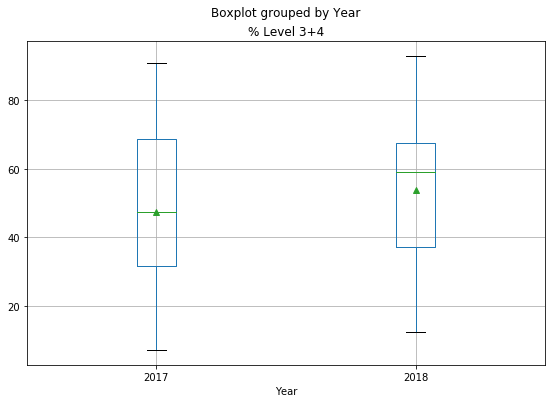

In [42]:
appended_df.boxplot("% Level 3+4", by="Year", figsize=(9, 6), meanline=False, showmeans=True)

In [43]:
grouped_append = appended_df.groupby(["DBN", "Year"], as_index=False)["% Level 3+4"].mean()
grouped_append.head(5)

,DBN,Year,% Level 3+4
0,02M033,2017,68.661972
1,02M033,2018,67.326736
2,03M242,2017,20.588236
3,03M242,2018,30.434782
4,03M421,2017,31.666666


In [44]:
nofulltime_test = appended_df[appended_df['Year'] == '2017']
fulltime_test = appended_df[appended_df['Year'] == '2018']

stats.ttest_ind(nofulltime_test['% Level 3+4'], fulltime_test['% Level 3+4'], equal_var=False)

Ttest_indResult(statistic=-1.6664552937402797, pvalue=0.09783091673389491)

Analyze Data- Full Time + Full Time Plus vs. Part Time/ None
1. Math and ELA together
2. Math only
3. ELA only

In [45]:
#Create a column that combines the Full Time and Full Time Plus columns
renamed_df['Any Full Time'] = renamed_df["Full Time"] + renamed_df["Full Time Plus"]
anyfulltime_df = renamed_df
anyfulltime_df.head()

,DBN,School Name,Grade,Year,Subject,# Level 3+4,% Level 3+4,Full Time,Full Time Plus,Part Time,None,Any Full Time
3,01M015,P.S. 015 ROBERTO CLEMENTE,All Grades,2017,ELA,24,35.820896,0.0,1.0,0.0,0.0,1.0
7,01M015,P.S. 015 ROBERTO CLEMENTE,All Grades,2017,Math,24,35.820896,0.0,1.0,0.0,0.0,1.0
11,01M015,P.S. 015 ROBERTO CLEMENTE,All Grades,2018,ELA,45,67.164177,0.0,1.0,0.0,0.0,1.0
15,01M015,P.S. 015 ROBERTO CLEMENTE,All Grades,2018,Math,45,67.164177,0.0,1.0,0.0,0.0,1.0
19,01M015,P.S. 015 ROBERTO CLEMENTE,All Grades,2019,ELA,42,60.000000,0.0,1.0,0.0,0.0,1.0


In [46]:
#1. Math and ELA together frequencies
anyfulltime_df.groupby(["Any Full Time"])["% Level 3+4"].count()

Any Full Time
0.0    1876
1.0    4400
Name: % Level 3+4, dtype: int64

In [47]:
#2. Math only frequencies
cond1 = anyfulltime_df['Subject'] == 'Math'
math_anyfulltime_renamed_df = anyfulltime_df[cond1]
math_anyfulltime_renamed_df.groupby(["Any Full Time"])["% Level 3+4"].count()

Any Full Time
0.0     938
1.0    2200
Name: % Level 3+4, dtype: int64

In [48]:
#3. ELA only frequencies
cond1 = anyfulltime_df['Subject'] == 'ELA'
ela_anyfulltime_renamed_df = anyfulltime_df[cond1]
ela_anyfulltime_renamed_df.groupby(["Any Full Time"])["% Level 3+4"].count()

Any Full Time
0.0     938
1.0    2200
Name: % Level 3+4, dtype: int64

In [49]:
#1. Math and ELA descriptives pd.concat([s1, s2], ignore_index=True), df.columns = ['a', 'b', 'c']
MandELA_mean = anyfulltime_df.groupby(["Any Full Time"])["% Level 3+4"].mean()
MandELA_median = anyfulltime_df.groupby(["Any Full Time"])["% Level 3+4"].median()
MandELA_var = anyfulltime_df.groupby(["Any Full Time"])["% Level 3+4"].var()
MandELA_std = anyfulltime_df.groupby(["Any Full Time"])["% Level 3+4"].std()
MandELA_max = anyfulltime_df.groupby(["Any Full Time"])["% Level 3+4"].max()
MandELA_min = anyfulltime_df.groupby(["Any Full Time"])["% Level 3+4"].min()

summary = pd.concat([MandELA_mean, MandELA_median, MandELA_var, MandELA_std, 
                     MandELA_max, MandELA_min], axis=1, join='inner')

summary.columns = ['Mean', 'Median', 'Variance', "Standard Deviation", "Maximum", "Minimum"]
summary

,Mean,Median,Variance,Standard Deviation,Maximum,Minimum
Any Full Time,,,,,,
0.0,43.715832,39.627464,439.067056,20.953927,100.0,0.000000
1.0,44.233961,40.758720,399.915158,19.997879,100.0,2.380952


In [50]:
#2. Math descriptives pd.concat([s1, s2], ignore_index=True), df.columns = ['a', 'b', 'c']
M_mean = math_anyfulltime_renamed_df.groupby(["Any Full Time"])["% Level 3+4"].mean()
M_median = math_anyfulltime_renamed_df.groupby(["Any Full Time"])["% Level 3+4"].median()
M_var = math_anyfulltime_renamed_df.groupby(["Any Full Time"])["% Level 3+4"].var()
M_std = math_anyfulltime_renamed_df.groupby(["Any Full Time"])["% Level 3+4"].std()
M_max = math_anyfulltime_renamed_df.groupby(["Any Full Time"])["% Level 3+4"].max()
M_min = math_anyfulltime_renamed_df.groupby(["Any Full Time"])["% Level 3+4"].min()

m_summary = pd.concat([M_mean, M_median, M_var, M_std, 
                     M_max, M_min], axis=1, join='inner')

m_summary.columns = ['Mean', 'Median', 'Variance', "Standard Deviation", "Maximum", "Minimum"]
m_summary

,Mean,Median,Variance,Standard Deviation,Maximum,Minimum
Any Full Time,,,,,,
0.0,43.715832,39.627464,439.301350,20.959517,100.0,0.000000
1.0,44.233961,40.758720,400.006089,20.000152,100.0,2.380952


In [51]:
#3. ELA descriptives pd.concat([s1, s2], ignore_index=True), df.columns = ['a', 'b', 'c']
ela_mean = ela_anyfulltime_renamed_df.groupby(["Any Full Time"])["% Level 3+4"].mean()
ela_median = ela_anyfulltime_renamed_df.groupby(["Any Full Time"])["% Level 3+4"].median()
ela_var = ela_anyfulltime_renamed_df.groupby(["Any Full Time"])["% Level 3+4"].var()
ela_std = ela_anyfulltime_renamed_df.groupby(["Any Full Time"])["% Level 3+4"].std()
ela_max = ela_anyfulltime_renamed_df.groupby(["Any Full Time"])["% Level 3+4"].max()
ela_min = ela_anyfulltime_renamed_df.groupby(["Any Full Time"])["% Level 3+4"].min()

ela_summary = pd.concat([ela_mean, ela_median, ela_var, ela_std, 
                     ela_max, ela_min], axis=1, join='inner')

ela_summary.columns = ['Mean', 'Median', 'Variance', "Standard Deviation", "Maximum", "Minimum"]
ela_summary

,Mean,Median,Variance,Standard Deviation,Maximum,Minimum
Any Full Time,,,,,,
0.0,43.715832,39.627464,439.301350,20.959517,100.0,0.000000
1.0,44.233961,40.758720,400.006089,20.000152,100.0,2.380952


In [52]:
#1. Math and ELA together Welch's independent ttest

#perform independent t-test to see if any full time supervisor is different from 1 not in both Math and ELA
#(Welch's t-test) equal_var = False
fulltime_test = anyfulltime_df[anyfulltime_df['Any Full Time'] == 1]
none_test = anyfulltime_df[anyfulltime_df['Any Full Time'] == 0]

stats.ttest_ind(fulltime_test['% Level 3+4'], none_test['% Level 3+4'], equal_var=False)

Ttest_indResult(statistic=0.9089500467066883, pvalue=0.36344099932157725)

In [53]:
#2. Math Welch's independent ttest

#perform independent t-test to see if no art programs is different from 1 or more art programs group both Math and ELA
#(Welch's t-test) equal_var = False
fulltime_test = math_anyfulltime_renamed_df[math_anyfulltime_renamed_df['Full Time'] == 1]
none_test = math_anyfulltime_renamed_df[math_anyfulltime_renamed_df['Full Time'] == 0]

stats.ttest_ind(fulltime_test['% Level 3+4'], none_test['% Level 3+4'], equal_var=False)

Ttest_indResult(statistic=0.8106641082662113, pvalue=0.4197445014919684)

AxesSubplot(0.1,0.15;0.8x0.75)


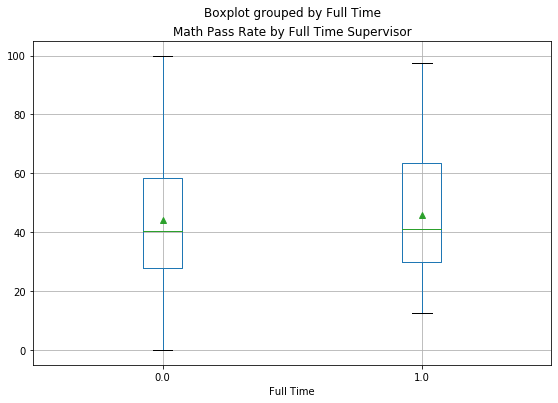

In [54]:
#2. Math boxplot
boxplot = math_anyfulltime_renamed_df.boxplot("% Level 3+4", by="Full Time", figsize=(9, 6), meanline=False, showmeans=True)
boxplot.set_title("Math Pass Rate by Full Time Supervisor")
print(boxplot)

In [55]:
#3. ELA Welch's independent ttest

#perform independent t-test to see if no art programs is different from 1 or more art programs group both Math and ELA
#(Welch's t-test) equal_var = False
fulltime_test = ela_anyfulltime_renamed_df[ela_anyfulltime_renamed_df['Full Time'] == 1]
none_test = ela_anyfulltime_renamed_df[ela_anyfulltime_renamed_df['Full Time'] == 0]

stats.ttest_ind(fulltime_test['% Level 3+4'], none_test['% Level 3+4'], equal_var=False)

Ttest_indResult(statistic=0.8106641082662113, pvalue=0.4197445014919684)

AxesSubplot(0.1,0.15;0.8x0.75)


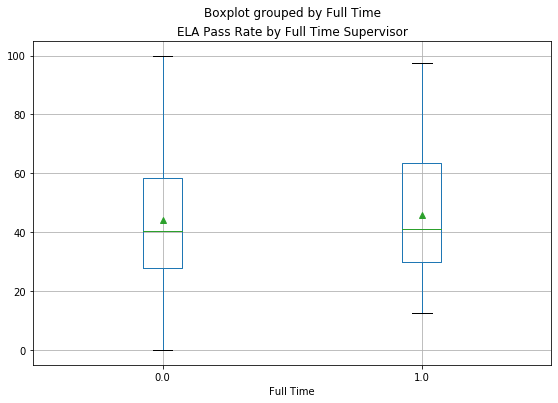

In [56]:
#3. ELA boxplot
boxplot = ela_anyfulltime_renamed_df.boxplot("% Level 3+4", by="Full Time", figsize=(9, 6), meanline=False, showmeans=True)
boxplot.set_title("ELA Pass Rate by Full Time Supervisor")
print(boxplot)

In [2]:
jupyter nbconvert --to script [aforshee_question1].ipynb

SyntaxError: invalid syntax (<ipython-input-2-344036168d7f>, line 1)